In [258]:
from sympy import *
import cmath
import math
import numpy as np
import matplotlib.pyplot as plt

PI = cmath.pi
i = complex(0, 1)
tetha_SPR = math.radians(50)            # degrees
calc_wl = 400e-9                        # metres

n = [1.00027, 1.54, 0.05, 2.756, 1.786] # Лист показателей преломления:  0 - AIR
#n = [1.00027, 1.53, 0.05, 2.863, 1.755]                               # 1 - GLASS (~BK7)
                                                                       # 2 - SILVER (Ag) (n_Mi)
                                                                       # 3 - Compensator (Fe2O3)
                                                                       # 4 - Decompensator (Al2O3)
eps = [1, 2.247, -15.243, 14.2, 0] # Лист диэлектрических проницаемостей:  0 - AIR
                                                                       # 1 - GLASS (~BK7)
                                                                       # 2 - SILVER (Ag) (n_Mi)
                                                                       # 3 - Compensator (Fe2O3)
                                                                       # 4 - Decompensator (Al2O3)
miu = [1, 1, 1, 1, 1] # Лист магнитных проницаемостей:  0 - AIR
                                                                        # 1 - GLASS (~BK7)
                                                                        # 2 - SILVER (Ag) (n_Mi)
                                                                        # 3 - Compensator (Fe2O3)
                                                                        # 4 - Decompensator (Al2O3)
d = [0, 5e-2, 50e-9, 50.34e-9, 50.9e-9]      # Толщины слоев:                  0 - AIR
                                                                        # 1 - GLASS (~BK7)
                                                                        # 2 - SILVER (Ag) (n_Mi)
                                                                        # 3 - Compensator (Fe2O3)
                                                                        # 4 - Decompensator (Al2O3)
a, b, step = 450, 600, 5
d3_mas = np.array(range(a, b, step))
d3_mas = d3_mas * 10**-10

theta_mas = np.array(range(60, 200)) / 100

teta_res, n1, n2, n3, n4, n5, eps1, eps2, eps3, eps4, eps5, wl, d1, d2, d3, d4, d5 = symbols('teta_res n1 n2 n3 n4 n5 eps1 eps2 eps3 eps4 eps5 wl d1 d2 d3 d4 d5')

q1 = ((eps1-(n1**2)*(sin(teta_res)**2))**(1/2))/eps1
q2 = ((eps2-(n1**2)*(sin(teta_res)**2))**(1/2))/eps2
q3 = ((eps3-(n1**2)*(sin(teta_res)**2))**(1/2))/eps3
q4 = ((eps4-(n1**2)*(sin(teta_res)**2))**(1/2))/eps4
q5 = ((eps5-(n1**2)*(sin(teta_res)**2))**(1/2))/eps5

beta1 = (2*PI*d1/wl)*sqrt(eps1 - (n1**2)*sin(teta_res)**2)
beta2 = (2*PI*d2/wl)*sqrt(eps2 - (n1**2)*sin(teta_res)**2)
beta3 = (2*PI*d3/wl)*sqrt(eps3 - (n1**2)*sin(teta_res)**2)
beta4 = (2*PI*d4/wl)*sqrt(eps4 - (n1**2)*sin(teta_res)**2)
beta5 = (2*PI*d5/wl)*sqrt(eps5 - (n1**2)*sin(teta_res)**2)

M2 = Matrix([[cos(beta2), -i*sin(beta2/q2)], [-i*q2*sin(beta2), cos(beta2)]])
M3 = Matrix([[cos(beta3), -i*sin(beta3/q3)], [-i*q3*sin(beta3), cos(beta3)]])
M4 = Matrix([[cos(beta4), -i*sin(beta4/q4)], [-i*q4*sin(beta4), cos(beta4)]])

M = M2 * M3 * M4

M11 = M.row(0)[0]
M12 = M.row(0)[1]
M21 = M.row(1)[0]
M22 = M.row(1)[0]

# Пусть знаменатель reflectivity coeffitient = 0

res = Eq((M11 + M12*q5)*q1 - (M21 + M22*q5), 0)
T = (M11 + M12*q5)*q1 - (M21 + M22*q5) / (M11 + M12*q5)*q1 + (M21 + M22*q5)
#ress=simplify(res)
#res = solve(res, d3)
# Примем что магнитная проницаемость во всех веществах равна 1, тогда eps = n**2

res_subs = []
for i in range(len(theta_mas)):
    res_subs.append(abs(T.subs([(n1, n[1]), (eps1, eps[1]), (eps2, eps[2]), (eps3, eps[3]), (eps4, n[4]**2), (eps5, eps[0]), (d2, d[2]), (d4, d[4]), (teta_res, theta_mas[i]), (wl, calc_wl), (d3, d[3])])) ** 2)
# print(res_subs)

# res1 = solve(res_subs, d3)
# print(res1)
# res_min = min(res_subs)
'''
plt.plot(d3_mas, res_subs, label='Solutions')
plt.legend()
plt.show()
'''


"\nplt.plot(d3_mas, res_subs, label='Solutions')\nplt.legend()\nplt.show()\n"

In [259]:
import pandas as pd

data = pd.DataFrame({'d3': theta_mas, 'res': res_subs})

In [260]:
data['min'] = data['res'].min()

In [261]:
data['d3'][data['res']==r1]

83    1.43
Name: d3, dtype: float64

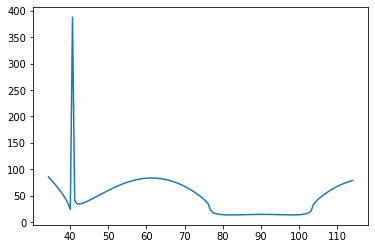

In [262]:
plt.plot([math.degrees(i) for i in theta_mas], res_subs, label='Solutions')


In [239]:
math.degrees(0.6)

34.37746770784939

In [275]:
# Посмотрим как ведут сеюя бэты
beta3_subs = []
for i in d3_mas:
    beta3_subs.append(beta3.subs([(eps3, n[3]**2), (n1, n[1]), (teta_res, tetha_SPR), (wl, calc_wl), (d3, i)]))
beta4_subs = []
for i in d3_mas:
    beta4_subs.append(beta4.subs([(eps4, n[4]**2), (n1, n[1]), (teta_res, tetha_SPR), (wl, calc_wl), (d4, i)]))

In [281]:
beta_test = pd.DataFrame({'d_var' : d3_mas, 'beta3' : beta3_subs, 'beta4' : beta4_subs})
beta_test

,d_var,beta3,beta4
0,4.500000e-08,1.76060578596470,0.947845118972946
1,4.550000e-08,1.78016807247542,0.958376731405979
2,4.600000e-08,1.79973035898614,0.968908343839012
3,4.650000e-08,1.81929264549686,0.979439956272045
4,4.700000e-08,1.83885493200758,0.989971568705077
5,4.750000e-08,1.85841721851830,1.00050318113811
6,4.800000e-08,1.87797950502902,1.01103479357114
7,4.850000e-08,1.89754179153974,1.02156640600418
8,4.900000e-08,1.91710407805046,1.03209801843721
9,4.950000e-08,1.93666636456117,1.04262963087024


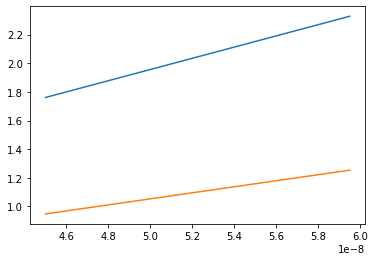

In [282]:
plt.plot(beta_test['d_var'], beta_test['beta3'], label='Beta 3')
plt.plot(beta_test['d_var'], beta_test['beta4'], label='Beta 4')